<a href="https://colab.research.google.com/github/seanzhu815/business-forecasting/blob/main/Copy_of_405_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part I

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CPIAUCSL_2022.csv to CPIAUCSL_2022.csv
Saving Data_year.csv to Data_year.csv
Saving GOLD_2022.csv to GOLD_2022.csv
Saving SP500_2022.csv to SP500_2022.csv
Saving UNRATE_2022.csv to UNRATE_2022.csv


##Question 1


### import data

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
#input the data of the 4 variables
df1 = pd.read_csv('CPIAUCSL_2022.csv',index_col='Date', parse_dates=True)
df2 = pd.read_csv('GOLD_2022.csv',index_col='Date', parse_dates=True)
df3 = pd.read_csv('UNRATE_2022.csv',index_col='Date', parse_dates=True)
df4 = pd.read_csv('SP500_2022.csv',index_col='Date', parse_dates=True)

### Time-series plot


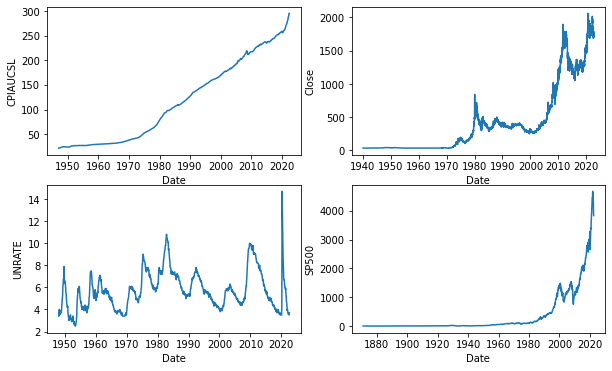

In [ ]:

#Produce a time-series plot for each variable
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

df1['Date'] = df1.index
df2['Date'] = df2.index
df3['Date'] = df3.index
df4['Date'] = df4.index

sns.lineplot(ax=axes[0, 0],data=df1,x='Date', y='CPIAUCSL')
sns.lineplot(ax=axes[0, 1],data=df2,x='Date', y='Close')
sns.lineplot(ax=axes[1, 0],data=df3,x='Date', y='UNRATE')
sns.lineplot(ax=axes[1, 1],data=df4,x='Date', y='SP500')



### Transformed series plots

In [ ]:

df1['log_first_difference_CPI']=np.log(df1['CPIAUCSL']/df1['CPIAUCSL'].shift(1)).dropna()
df2['log_first_difference_GD']=np.log(df2['Close']/df2['Close'].shift(1)).dropna()
df3['log_first_difference_UNR']=np.log(df3['UNRATE']/df3['UNRATE'].shift(1)).dropna()
df4['log_first_difference_SP500']=np.log(df4['SP500']/df4['SP500'].shift(1)).dropna()

df1.set_index('Date',drop=True)
df2.set_index('Date',drop=True)
df3.set_index('Date',drop=True)
df4.set_index('Date',drop=True)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.lineplot(ax=axes[0, 0],data=df1,x='Date', y='log_first_difference_CPI')
sns.lineplot(ax=axes[0, 1],data=df2,x='Date', y='log_first_difference_GD')
sns.lineplot(ax=axes[1, 0],data=df3,x='Date', y='log_first_difference_UNR')
sns.lineplot(ax=axes[1, 1],data=df4,x='Date', y='log_first_difference_SP500')

### Augmented Dickey-Fuller test to formally show that our variable is non-stationary.

In [ ]:
#a general function that returns the result of an ADF test regardless of the series chosen. 
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,x):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, regression=x,autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [ ]:
adf_test(df1['CPIAUCSL'],'c')
adf_test(df1['CPIAUCSL'],'nc')
adf_test(df1['CPIAUCSL'],'ct')

We ran the ADF test three times to include different specifications of the ADF test. In none of the tests we were able to reject the null hypothesis of non-stationarity. Therefore, we conclude that our series definitely is non-stationary.

In [ ]:
df1['CPIAUCSLlog'] = np.log(df1['CPIAUCSL'])
df1['DCPIlog'] = df1['CPIAUCSLlog'].diff()
adf_test(df1['DCPIlog'].iloc[1:],'c')

We reject the null hypothesis of non-stationarity. Therefore it is enough to difference our variable once.We just difference it once and it become stationary.

##Question2


Auto-correlation 

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

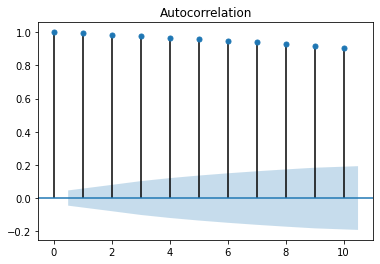

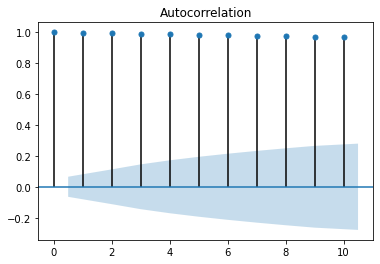

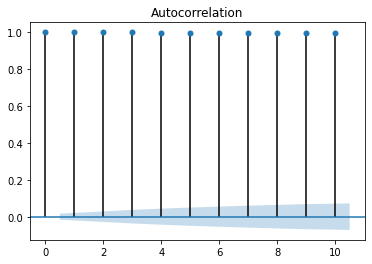

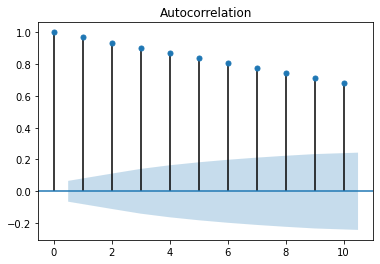

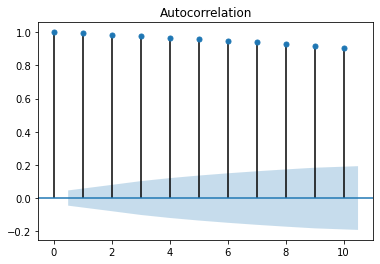

In [ ]:
sm.graphics.tsa.plot_acf(df1['CPIAUCSL'].squeeze(), lags=10)
sm.graphics.tsa.plot_acf(df2['Close'].squeeze(), lags=10)
sm.graphics.tsa.plot_acf(df3['UNRATE'].squeeze(), lags=10)
sm.graphics.tsa.plot_acf(df4['SP500'].squeeze(), lags=10)

Partial Auto-Correlation 

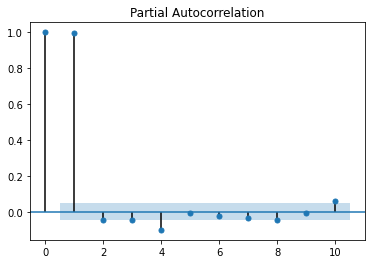

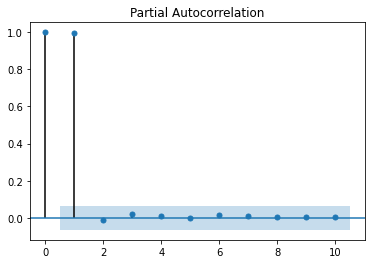

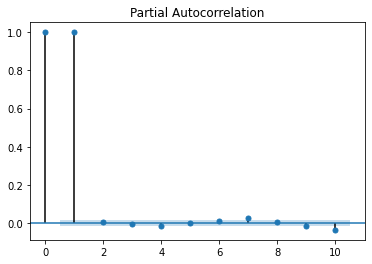

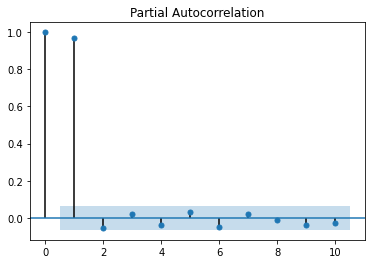

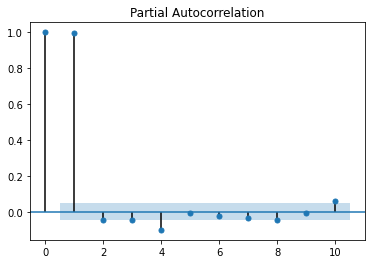

In [ ]:
sm.graphics.tsa.plot_pacf(df1['CPIAUCSL'].squeeze(), lags=10)
sm.graphics.tsa.plot_pacf(df2['Close'].squeeze(), lags=10)
sm.graphics.tsa.plot_pacf(df3['UNRATE'].squeeze(), lags=10)
sm.graphics.tsa.plot_pacf(df4['SP500'].squeeze(), lags=10)

Ljung Box Test to test if the autocorrelation is statistically significant

In [ ]:
sm.stats.acorr_ljungbox(df1['CPIAUCSL'], lags=[1], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,903.792959,1.469870e-198,900.810144,6.541921e-198


In [ ]:
sm.stats.acorr_ljungbox(df1['CPIAUCSL'], lags=[12], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,10523.762237,0.0,10426.097003,0.0


In [ ]:
sm.stats.acorr_ljungbox(df2['Close'], lags=[1], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,14084.90717,0.0,14081.909106,0.0


In [ ]:
sm.stats.acorr_ljungbox(df2['Close'], lags=[12], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,168422.608975,0.0,168321.125609,0.0


In [ ]:
sm.stats.acorr_ljungbox(df3['UNRATE'], lags=[1], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,841.862397,4.272759e-185,839.049939,1.746428e-184


In [ ]:
sm.stats.acorr_ljungbox(df3['UNRATE'], lags=[12], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,6925.26588,0.0,6866.734382,0.0


In [ ]:
sm.stats.acorr_ljungbox(df4['SP500'], lags=[1], return_df=True, boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,1796.749506,0.0,1793.789457,0.0


In [ ]:
sm.stats.acorr_ljungbox(df4['SP500'], lags=[12], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,19478.242951,0.0,19389.938267,0.0


## Question3


### ARMA model 


In [ ]:
import statsmodels
import itertools
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
def AIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any value between 0 and 2
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
      try:
          mod = ARIMA(df,
                      order=comb,
                      enforce_stationarity=True,
                      enforce_invertibility=True)
          
          output = mod.fit()
          ans.append([comb, output.aic])
          print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, output.aic))
      except:
        continue
# Find the parameters with minimal AIC value
    ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
    print(ans_df.loc[ans_df['aic'].idxmin()])
    return ans_df

In [ ]:
def BIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any user defined value. We need to be careful with integration order,
# cannot be 0.
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
      try:
          mod = ARIMA(df,
                      order=comb,
                      enforce_stationarity=True,
                      enforce_invertibility=True)
          
          output = mod.fit()
          ans.append([comb, output.aic])
          print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, output.bic))
      except:
        continue
# Find the parameters with minimal AIC value
    ans_df = pd.DataFrame(ans, columns=['pdq', 'bic'])
    print(ans_df.loc[ans_df['bic'].idxmin()])
    return ans_df

In [ ]:
AIC_PDQ(df1['DCPIlog'].iloc[1:],6,1,6)

pdq      (1, 0, 2)
aic   -8126.152166
Name: 8, dtype: object


,pdq,aic
0,"(0, 0, 0)",-7695.417068
1,"(0, 0, 1)",-7952.627219
2,"(0, 0, 2)",-7998.103492
3,"(0, 0, 3)",-8029.620725
4,"(0, 0, 4)",-8037.769982
5,"(0, 0, 5)",-8049.249898
6,"(1, 0, 0)",-8057.451479
7,"(1, 0, 1)",-8079.187191
8,"(1, 0, 2)",-8126.152166
9,"(1, 0, 3)",-8122.555006


In [ ]:
BIC_PDQ(df1['DCPIlog'].iloc[1:],6,1,6)

pdq      (1, 0, 2)
bic   -8126.152166
Name: 8, dtype: object


,pdq,bic
0,"(0, 0, 0)",-7695.417068
1,"(0, 0, 1)",-7952.627219
2,"(0, 0, 2)",-7998.103492
3,"(0, 0, 3)",-8029.620725
4,"(0, 0, 4)",-8037.769982
5,"(0, 0, 5)",-8049.249898
6,"(1, 0, 0)",-8057.451479
7,"(1, 0, 1)",-8079.187191
8,"(1, 0, 2)",-8126.152166
9,"(1, 0, 3)",-8122.555006


We tested the combination of AR and MA parameters, both AIC and BIC gives us the same answer。The best model appears to be an ARMA(1,2)

### Forecast with ARMA model

In [ ]:
df1_train = df1.iloc[1:638,]
df1_test = df1.iloc[638:,]

In [ ]:
mod_CPI = ARIMA(df1_train['DCPIlog'], order=(1,0,2))
mod_CPI_res = mod_CPI.fit()
mod_CPI_res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                DCPIlog   No. Observations:                  637
Model:                 ARIMA(1, 0, 2)   Log Likelihood                2874.556
Date:                Thu, 29 Sep 2022   AIC                          -5739.111
Time:                        18:18:37   BIC                          -5716.827
Sample:                    02-01-1947   HQIC                         -5730.460
                         - 02-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.001      4.768      0.000       0.002       0.005
ar.L1          0.9351      0.018     52.815      0.000       0.900       0.970
ma.L1         -0.5322      0.026    -20.520      0.000      -0.583      -0.481
ma.L2         -0.0848      0.031     -2.775      0.006      -0.145      -0.025
sigma2      7.033e-06   2.14e-07     32.813      0.000    6.61e-06    7.45e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):               839.68
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Question 4

###Plot the fitted value for ARIMA model

In [ ]:
CPI_fit = mod_CPI_res.predict()

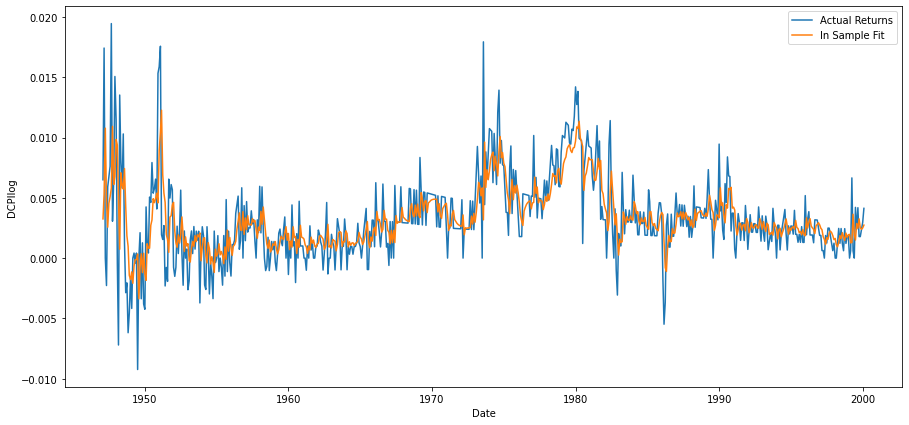

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.lineplot(data=df1_train['DCPIlog'],label = 'Actual Returns')
sns.lineplot(data=CPI_fit, label = 'In Sample Fit')
plt.legend()
plt.show()

# **Part_2**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving INDPRO.xls to INDPRO.xls
Saving Keeling_CO2data_2022-1.xlsx to Keeling_CO2data_2022-1.xlsx


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
dfco2 = pd.read_excel('Keeling_CO2data_2022-1.xlsx')
dfco2['Date'] = pd.to_datetime(dfco2['Date'],format='%y%m%d')
df_co2=dfco2.set_index('Date')


## **Question_1**

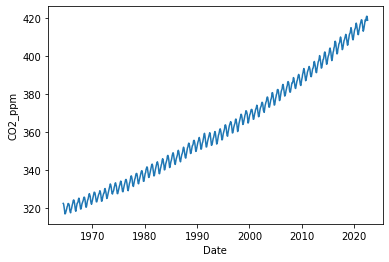

In [ ]:
sns.lineplot(data=df_co2,x='Date', y='CO2_ppm')
plt.show()

The seasonal effect based on years, in each year the Co2 would experience an increase than a decrease in the same year. But the overall trend through years are increase.

## **Question_2**

In [ ]:
up_200912 = df_co2.truncate(after='2010-01')
print(up_200912.tail())
up_200912['trend'] = [i for i in range(1,len(up_200912)+1)]
model_trend = smf.ols(formula = 'CO2_ppm~ 1 + trend', data= up_200912).fit()
print(model_trend.summary())

            CO2_ppm
Date               
2009-08-31   386.06
2009-09-30   384.64
2009-10-31   384.32
2009-11-30   386.05
2009-12-31   387.48
                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.945e+04
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:43:33   Log-Likelihood:                -1325.4
No. Observations:                 548   AIC:                             2655.
Df Residuals:                     546   BIC:                             2663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

Through the p-value shows in both Intercept and trend are 0, we conclude the trend is significant.

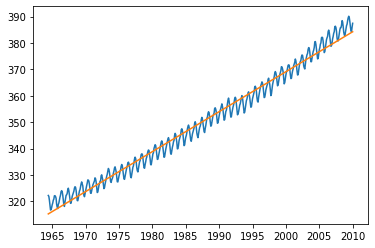

In [ ]:
up_200912['trend_linerfit']=model_trend.predict()
plt.plot(up_200912['CO2_ppm'])
plt.plot(up_200912['trend_linerfit'])
plt.show()

Through the graph shows It is not a good fit.

## **Question_3**

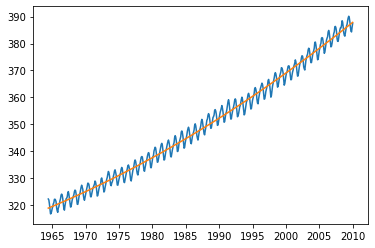

In [ ]:
up_200912['trend2'] = [i**2 for i in range(1,len(up_200912)+1)]
model_trend_2 = smf.ols(formula = 'CO2_ppm~ 1 + trend + trend2', data= up_200912).fit()
up_200912['trend2_fit'] = model_trend_2.predict()
plt.plot(up_200912['CO2_ppm'])
plt.plot(up_200912['trend2_fit'])
plt.show()

Here We choose to use quadratic trend which is trend plus trend squared to make the trend be curved to fitter more with actual data.

## **Question_4**

In [ ]:
season=pd.DataFrame(pd.get_dummies(up_200912.index.month))
season.columns= ['Jan', 'Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
reset_index_up1 = up_200912.reset_index()
UP_200912 = pd.merge(reset_index_up1,season,left_index=True, right_index=True).set_index('Date')
print(UP_200912.head())

            CO2_ppm  trend  trend_linerfit  trend2  trend2_fit  Jan  Feb  Mar  \
Date                                                                            
1964-05-31   322.25      1      315.259852       1  318.856553    0    0    0   
1964-06-30   321.89      2      315.386013       4  318.943262    0    0    0   
1964-07-31   320.44      3      315.512173       9  319.030114    0    0    0   
1964-08-31   318.69      4      315.638333      16  319.117112    0    0    0   
1964-09-30   316.71      5      315.764494      25  319.204254    0    0    0   

            Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  
Date                                                     
1964-05-31    0    1    0    0    0    0    0    0    0  
1964-06-30    0    0    1    0    0    0    0    0    0  
1964-07-31    0    0    0    1    0    0    0    0    0  
1964-08-31    0    0    0    0    1    0    0    0    0  
1964-09-30    0    0    0    0    0    1    0    0    0  


In [ ]:
model_trs = smf.ols(formula='CO2_ppm ~ 1 + trend + trend2 + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec', data = UP_200912).fit()
print(model_trs.summary())

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.259e+04
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:43:47   Log-Likelihood:                -520.19
No. Observations:                 548   AIC:                             1068.
Df Residuals:                     534   BIC:                             1129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    318.8153      0.122   2611.371      0.0

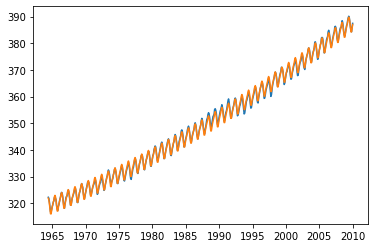

In [ ]:
UP_200912['trs_fit'] =model_trs.predict()
plt.plot(UP_200912['CO2_ppm'])
plt.plot(UP_200912['trs_fit'])
plt.show()

Through the p value we can conclude every element here is significant, and the model shows a higher R^2

## **Question_5**

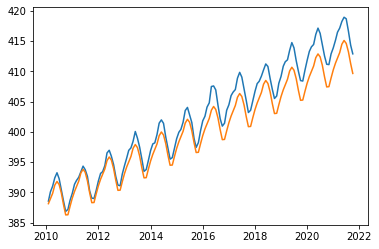

In [ ]:
test_data_co2 = df_co2.truncate(before='2010-01',after='2021-10')
season1=pd.DataFrame(pd.get_dummies(test_data_co2.index.month))
season1.columns= ['Jan', 'Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
test_data_co2['trend'] = [i for i in range(len(up_200912)+1,len(test_data_co2)+len(up_200912)+1)]
test_data_co2 ['trend2'] = [i**2 for i in range(len(up_200912)+1,len(test_data_co2)+len(up_200912)+1)]
reset_index_up2 = test_data_co2.reset_index()
forcast_data_co2 = pd.merge(reset_index_up2,season1,left_index=True, right_index=True).set_index('Date')
forcast_data_co2['trs_fit'] =model_trs.predict(forcast_data_co2)

plt.plot(forcast_data_co2['CO2_ppm'])
plt.plot(forcast_data_co2['trs_fit'])
plt.show()

The graph shows the model is underestimate, and the underestimation increase thorugh time

## **Question_6**

We choose 'Industrial Production:Total Index', which measures the real output of all relevant establishments located in the United States, the data get from FRED.

Why we choose IP: Because Production industry is one of the most important sources of co2 emissions. And US is the second biggest country in production industry.(China is the frist biggest one but its Industrialization Process started later than US, so that we choose to use U.S. data instead of China because of the sample size of data.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving INDPRO.xls to INDPRO (1).xls


In [ ]:
dfinpro =pd.read_excel('INDPRO.xls')
co2_inpro = pd.merge(dfinpro,dfco2,left_index=True, right_index=True).set_index('Date').drop(columns=['Date_1'])
inpro = co2_inpro['INDPRO']
co2 = co2_inpro['CO2_ppm']
print(np.corrcoef(inpro,co2))

[[1.         0.95518045]
 [0.95518045 1.        ]]


According to the correlation is 0.995, we conclude there is a positive strongly relation between IP index and Co2 commission.

In [ ]:
test_data_inpro = inpro.truncate(after='2010-01')
test_co2_inpro =pd.merge(test_data_inpro,UP_200912,left_index=True, right_index=True)
test_co2_inpro['INDPRO']=0.995*test_co2_inpro['INDPRO']
model_new = smf.ols(formula='CO2_ppm ~ 1 + trend + trend2 + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec + INDPRO', data = test_co2_inpro).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.029e+04
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        04:44:00   Log-Likelihood:                -514.61
No. Observations:                 548   AIC:                             1059.
Df Residuals:                     533   BIC:                             1124.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    319.5120      0.243   1316.854      0.0

The summary table shows there is the same high R^2 with the original model, but the new model has a lower AIC and BIC which means the new model(with new variable) is a better-fit model.

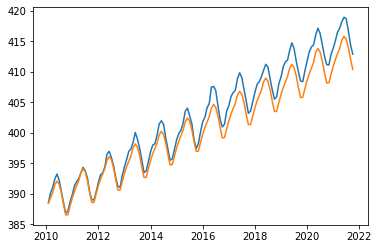

In [ ]:
test_data_inpro_1 = inpro.truncate(before='2010-01',after='2021-10')
merged = pd.merge(test_data_inpro_1,forcast_data_co2,left_index=True, right_index=True)
merged['trs_fit_new'] =model_new.predict(merged)
plt.plot(merged['CO2_ppm'])
plt.plot(merged['trs_fit_new'])
plt.show()

Using the same data forcast horizon above (2010.10-2021.09),we can see the result graoh is similar to the origianal model, so we calculate the mean diference between the actual price and the predicted price through two meodels.

In [ ]:
mean_diff_new = np.mean(merged['CO2_ppm']-merged['trs_fit_new'])
mean_diff_old = np.mean(merged['CO2_ppm']-merged['trs_fit'])
print(mean_diff_new)
print(mean_diff_old)

1.748057873499445
2.170910476360656


The result shows the mean diference between the actual price and the predicted price of the new model is smaller than the original one, which means this new variable makes the model fits better.

## **Question_7**

2032.01.31-2032.12.31

In [ ]:
date = pd.date_range(start = '20320131',end='20321231',freq='M')
forcast = pd.DataFrame(index =date,  columns=['predicted'])
print(forcast.head())

In [ ]:
season_new=pd.DataFrame(pd.get_dummies(forcast.index.month))
season_new.columns= ['Jan', 'Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
forcast['trend'] = [i for i in range(len(dfco2)+1,len(dfco2)+len(forcast)+1)]
forcast ['trend2'] = [i**2 for i in range(len(dfco2)+1,len(dfco2)+len(forcast)+1)]
reset_index_up3 = forcast.reset_index()
forcast_new = pd.merge(reset_index_up3,season_new,left_index=True, right_index=True).set_index('index')
forcast_new['predicted'] =model_trs.predict(forcast_new)
plt.plot(forcast_new['predicted'])
plt.show()